In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pisa-test-scores/pisa2009test.csv
/kaggle/input/pisa-test-scores/pisa2009train.csv


# Data Loading and Preprocessing

1. Data Loading and Preprocessing\
• Load the dataset and inspect the data for missing values and data types.\
• Clean the data by handling missing values and converting categorical variables as
needed.


In [2]:
pisa_df = pd.read_csv("/kaggle/input/pisa-test-scores/pisa2009train.csv")

In [3]:
pisa_df.head(5)

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,grade,male,raceeth,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,...,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore
0,11,1,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,...,0.0,1.0,0.0,225.0,NaN,1.0,1,1,673.0,476.00
1,11,1,White,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,450.0,25.0,1.0,1,0,1173.0,575.01
2,9,1,White,1.0,1.0,1.0,1.0,1.0,1.0,NaN,...,1.0,1.0,0.0,250.0,28.0,1.0,1,0,1233.0,554.81
3,10,0,Black,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,200.0,23.0,1.0,1,1,2640.0,458.11
4,10,1,Hispanic,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,250.0,35.0,1.0,1,1,1095.0,613.89


Unique Grades: [11  9 10 12  8]


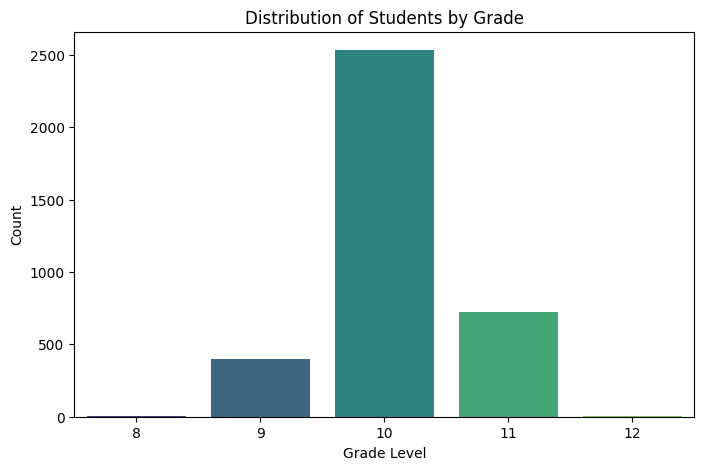

In [4]:
print("Unique Grades:", pisa_df["grade"].unique())

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.countplot(x="grade", data=pisa_df, palette="viridis")
plt.title("Distribution of Students by Grade")
plt.xlabel("Grade Level")
plt.ylabel("Count")
plt.show()

In [5]:
# Grade wise percentage of the data distribution
grade_counts = pisa_df["grade"].value_counts(normalize=True) * 100
print(grade_counts)

grade
10    69.123669
11    19.819820
9     10.838111
12     0.109200
8      0.109200
Name: proportion, dtype: float64


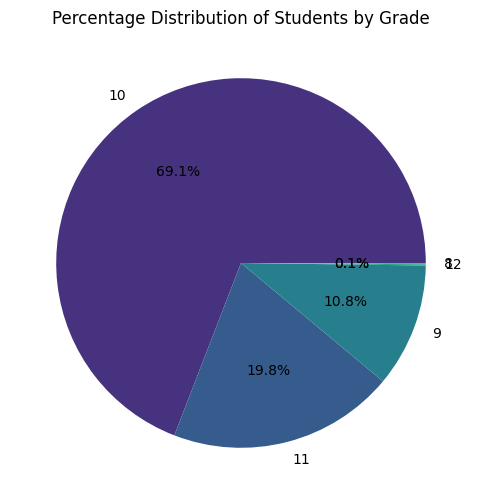

In [6]:
plt.figure(figsize=(8, 6))
plt.pie(grade_counts, labels=grade_counts.index, autopct="%1.1f%%", colors=sns.color_palette("viridis"))
plt.title("Percentage Distribution of Students by Grade")
plt.show()

The Second Column in the dataset 'male' is an indicator of whether the student is male (1 for male, 0 for female). Lets change the column name to more appropriate name 'Gender'.

In [7]:
pisa_df.rename(columns={"male": "gender"}, inplace=True)

In [8]:
gender_counts = pisa_df["gender"].value_counts()
print("Gender Distribution:\n", gender_counts)

Gender Distribution:
 gender
1    1872
0    1791
Name: count, dtype: int64


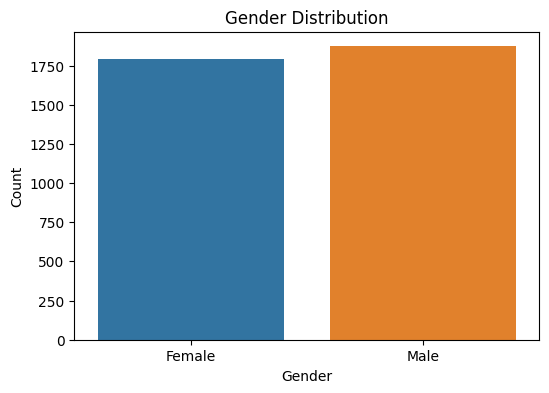

In [9]:
plt.figure(figsize=(6,4))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette=["#1f77b4", "#ff7f0e"])
plt.xticks(ticks=[0,1], labels=["Female", "Male"])
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

Lets find out the grade wise distribution of male and female students. 

In [10]:
gender_grade_counts = pisa_df.groupby(["grade", "gender"]).size().unstack()
print("Grade wise distribution of Gender:\n", gender_grade_counts)

Grade wise distribution of Gender:
 gender     0     1
grade             
8          2     2
9        146   251
10      1235  1297
11       406   320
12         2     2


In [11]:
gender_grade_percent = gender_grade_counts.div(gender_grade_counts.sum(axis=1), axis=0) * 100
# Percentage breakdown
print("Grade-wise Percentage Distribution of Gender:\n", gender_grade_percent)

Grade-wise Percentage Distribution of Gender:
 gender          0          1
grade                       
8       50.000000  50.000000
9       36.775819  63.224181
10      48.775671  51.224329
11      55.922865  44.077135
12      50.000000  50.000000


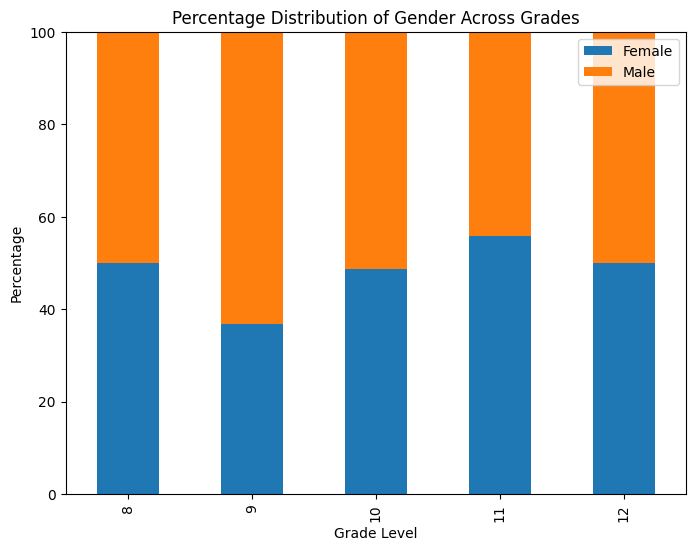

In [12]:
gender_grade_percent.plot(kind="bar", stacked=True, figsize=(8,6), color=["#1f77b4", "#ff7f0e"])
plt.title("Percentage Distribution of Gender Across Grades")
plt.xlabel("Grade Level")
plt.ylabel("Percentage")
plt.legend(["Female", "Male"])
plt.ylim(0, 100) 
plt.show()

Since 8th and 12th grades have extremely low representation, they might introduce noise rather than meaningful insights.

In [13]:
#Removing 8th and 12th grade from the dataset, since they only make 0.1% of the dataset. 
pisa_df = pisa_df[~pisa_df["grade"].isin([8, 12])]

In [14]:
pisa_df.shape

(3655, 24)

In [15]:
pisa_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3655 entries, 0 to 3662
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   grade                  3655 non-null   int64  
 1   gender                 3655 non-null   int64  
 2   raceeth                3620 non-null   object 
 3   preschool              3599 non-null   float64
 4   expectBachelors        3593 non-null   float64
 5   motherHS               3558 non-null   float64
 6   motherBachelors        3258 non-null   float64
 7   motherWork             3562 non-null   float64
 8   fatherHS               3410 non-null   float64
 9   fatherBachelors        3087 non-null   float64
 10  fatherWork             3422 non-null   float64
 11  selfBornUS             3586 non-null   float64
 12  motherBornUS           3584 non-null   float64
 13  fatherBornUS           3542 non-null   float64
 14  englishAtHome          3584 non-null   float64
 15  computerF

The 3rd Column Race/Ethinicity

In [16]:
print("Unique categories in raceeth:", pisa_df["raceeth"].unique())

Unique categories in raceeth: [nan 'White' 'Black' 'Hispanic' 'Asian' 'More than one race'
 'American Indian/Alaska Native' 'Native Hawaiian/Other Pacific Islander']


In [17]:
print(" 'raceeth' column NaN value count:", pisa_df["raceeth"].isnull().sum())

 'raceeth' column NaN value count: 35


In [18]:
# Count of each race/ethnicity group
raceeth_counts = pisa_df["raceeth"].value_counts()
print("Race/Ethnicity Distribution:\n", raceeth_counts)

Race/Ethnicity Distribution:
 raceeth
White                                     2011
Hispanic                                   833
Black                                      442
Asian                                      142
More than one race                         124
American Indian/Alaska Native               37
Native Hawaiian/Other Pacific Islander      31
Name: count, dtype: int64


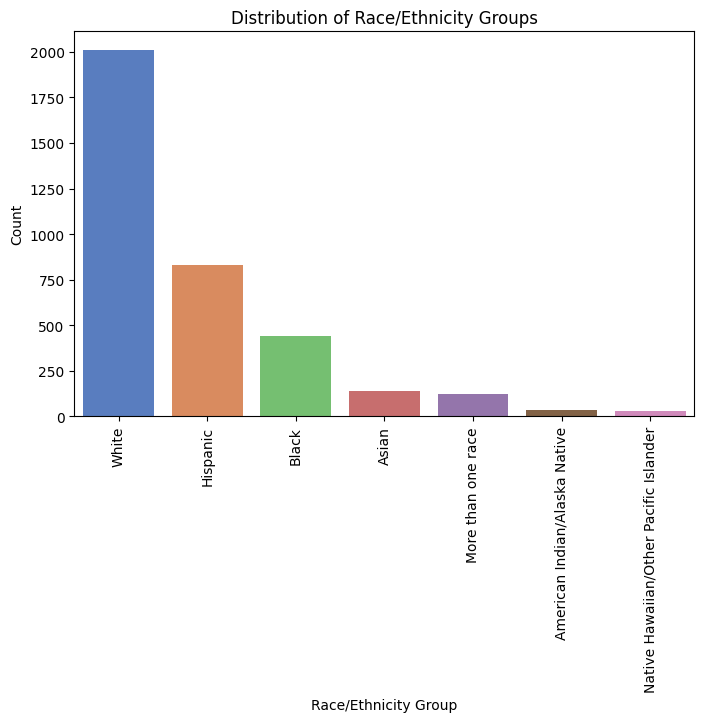

In [19]:
plt.figure(figsize=(8,5))
sns.barplot(x=raceeth_counts.index, y=raceeth_counts.values, palette="muted")
plt.title("Distribution of Race/Ethnicity Groups")
plt.xlabel("Race/Ethnicity Group")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

In [20]:
raceeth_grade_counts = pisa_df.groupby("grade")["raceeth"].value_counts().unstack()

# grade - Race/Ethinicity distibution counts
print("Race/Ethnicity Distribution by Grade:\n")
raceeth_grade_counts

Race/Ethnicity Distribution by Grade:



raceeth,American Indian/Alaska Native,Asian,Black,Hispanic,More than one race,Native Hawaiian/Other Pacific Islander,White
grade,,,,,,,
9,2,6,70,124,14,2,171
10,33,84,292,514,86,18,1485
11,2,52,80,195,24,11,355


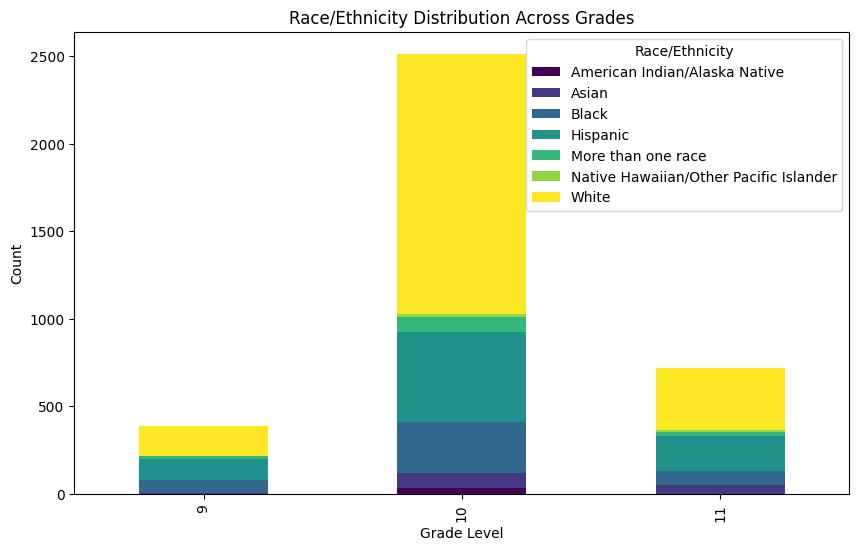

In [21]:
raceeth_grade_counts.plot(kind="bar", stacked=True, figsize=(10,6), colormap="viridis")
plt.title("Race/Ethnicity Distribution Across Grades")
plt.xlabel("Grade Level")
plt.ylabel("Count")
plt.legend(title="Race/Ethnicity")
plt.show()

<Figure size 1000x600 with 0 Axes>

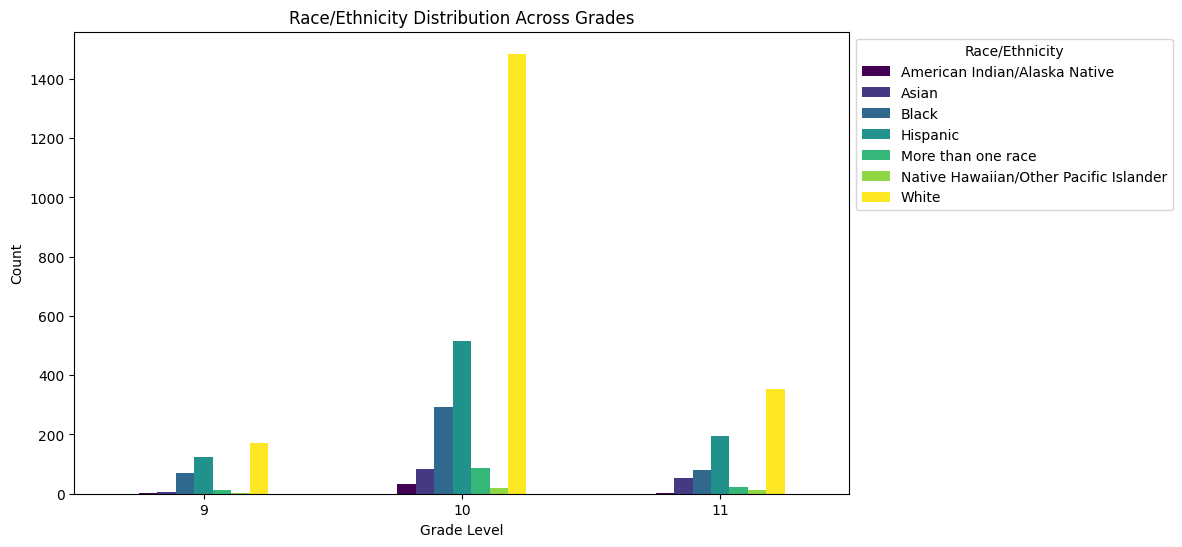

In [22]:
plt.figure(figsize=(10,6))
raceeth_grade_counts.plot(kind="bar", figsize=(10,6), colormap="viridis")
plt.title("Race/Ethnicity Distribution Across Grades")
plt.xlabel("Grade Level")
plt.ylabel("Count")
plt.legend(title="Race/Ethnicity", bbox_to_anchor=(1,1))
plt.xticks(rotation=0)
plt.show()

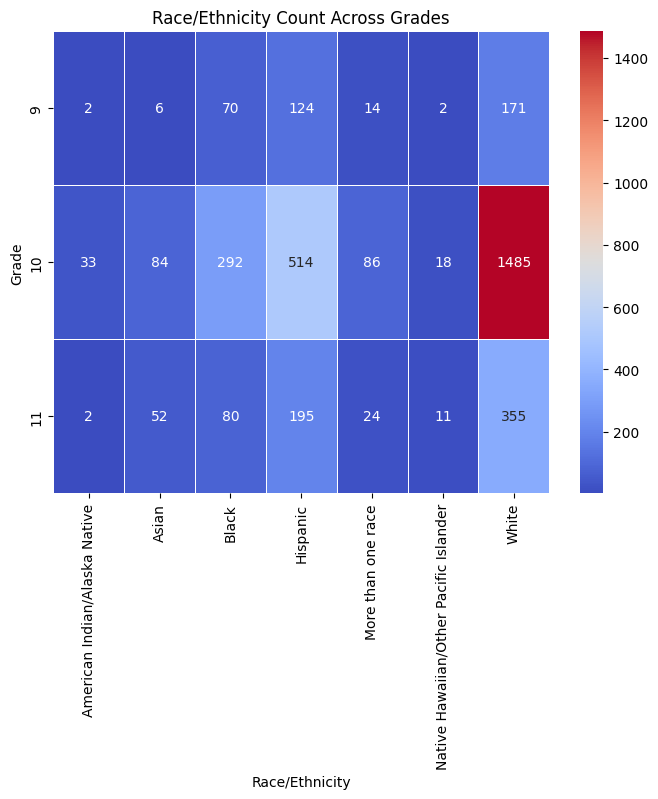

In [23]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(raceeth_grade_counts, cmap="coolwarm", annot=True, fmt="d", linewidths=0.5)
plt.title("Race/Ethnicity Count Across Grades")
plt.xlabel("Race/Ethnicity")
plt.ylabel("Grade")
plt.show()

In [24]:
print(pisa_df.isnull().sum())

grade                      0
gender                     0
raceeth                   35
preschool                 56
expectBachelors           62
motherHS                  97
motherBachelors          397
motherWork                93
fatherHS                 245
fatherBachelors          568
fatherWork               233
selfBornUS                69
motherBornUS              71
fatherBornUS             113
englishAtHome             71
computerForSchoolwork     65
read30MinsADay            34
minutesPerWeekEnglish    186
studentsInEnglish        247
schoolHasLibrary         142
publicSchool               0
urban                      0
schoolSize               161
readingScore               0
dtype: int64


<Axes: >

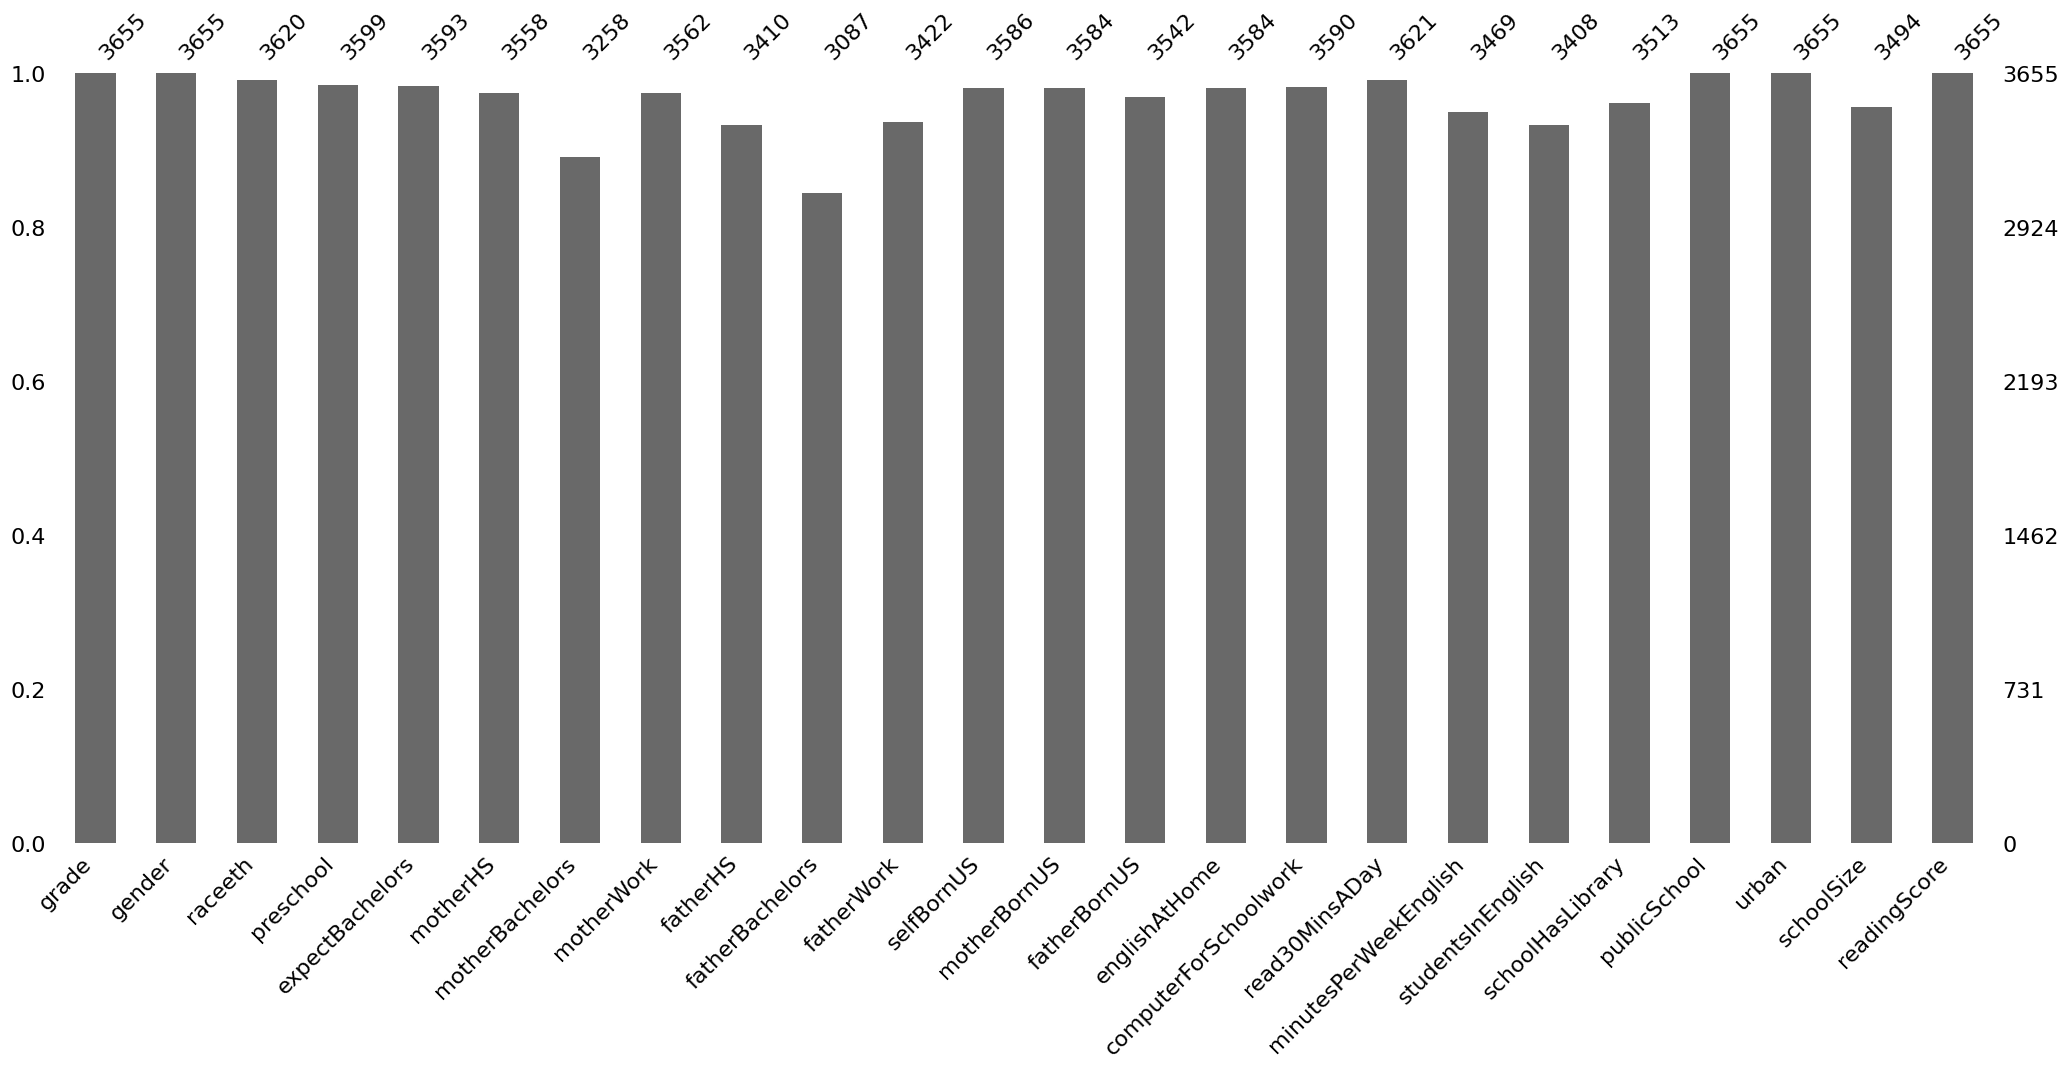

In [25]:
import missingno as msno   #visualizating missing data
import warnings
warnings.filterwarnings("ignore")

# Missing values in the dataset
msno.bar(pisa_df)

From the visualisations above we got to know the distribution of race/ethnicity across different grade levels (9th, 10th, and 11th). And its found that the 10th grade data has the highest counts in all three grade levels. 

**PISA dataset focuses on 15-year-olds, keeping only 10th-grade students will help maintain consistency and reduce missing values.**

In [26]:
pisa_grade10_df = pisa_df[pisa_df["grade"] == 10]
print(f"Dataset now contains {pisa_grade10_df.shape[0]} rows and {pisa_grade10_df.shape[1]} columns.")

Dataset now contains 2532 rows and 24 columns.


In [27]:
pisa_grade10_df.head(5)

,grade,gender,raceeth,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,...,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore
3,10,0,Black,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,200.0,23.0,1.0,1,1,2640.0,458.11
4,10,1,Hispanic,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,250.0,35.0,1.0,1,1,1095.0,613.89
5,10,1,Black,1.0,1.0,NaN,NaN,1.0,1.0,0.0,...,1.0,1.0,0.0,300.0,20.0,1.0,1,0,227.0,490.59
6,10,0,Asian,0.0,1.0,1.0,0.0,1.0,NaN,NaN,...,1.0,1.0,0.0,250.0,28.0,1.0,1,1,2080.0,604.36
7,10,0,White,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,1.0,300.0,30.0,1.0,1,0,1913.0,439.36


In [28]:
print(pisa_grade10_df.isnull().sum())

grade                      0
gender                     0
raceeth                   20
preschool                 36
expectBachelors           41
motherHS                  55
motherBachelors          256
motherWork                51
fatherHS                 152
fatherBachelors          360
fatherWork               144
selfBornUS                39
motherBornUS              40
fatherBornUS              65
englishAtHome             41
computerForSchoolwork     36
read30MinsADay            19
minutesPerWeekEnglish    110
studentsInEnglish        151
schoolHasLibrary          93
publicSchool               0
urban                      0
schoolSize                89
readingScore               0
dtype: int64


<Axes: >

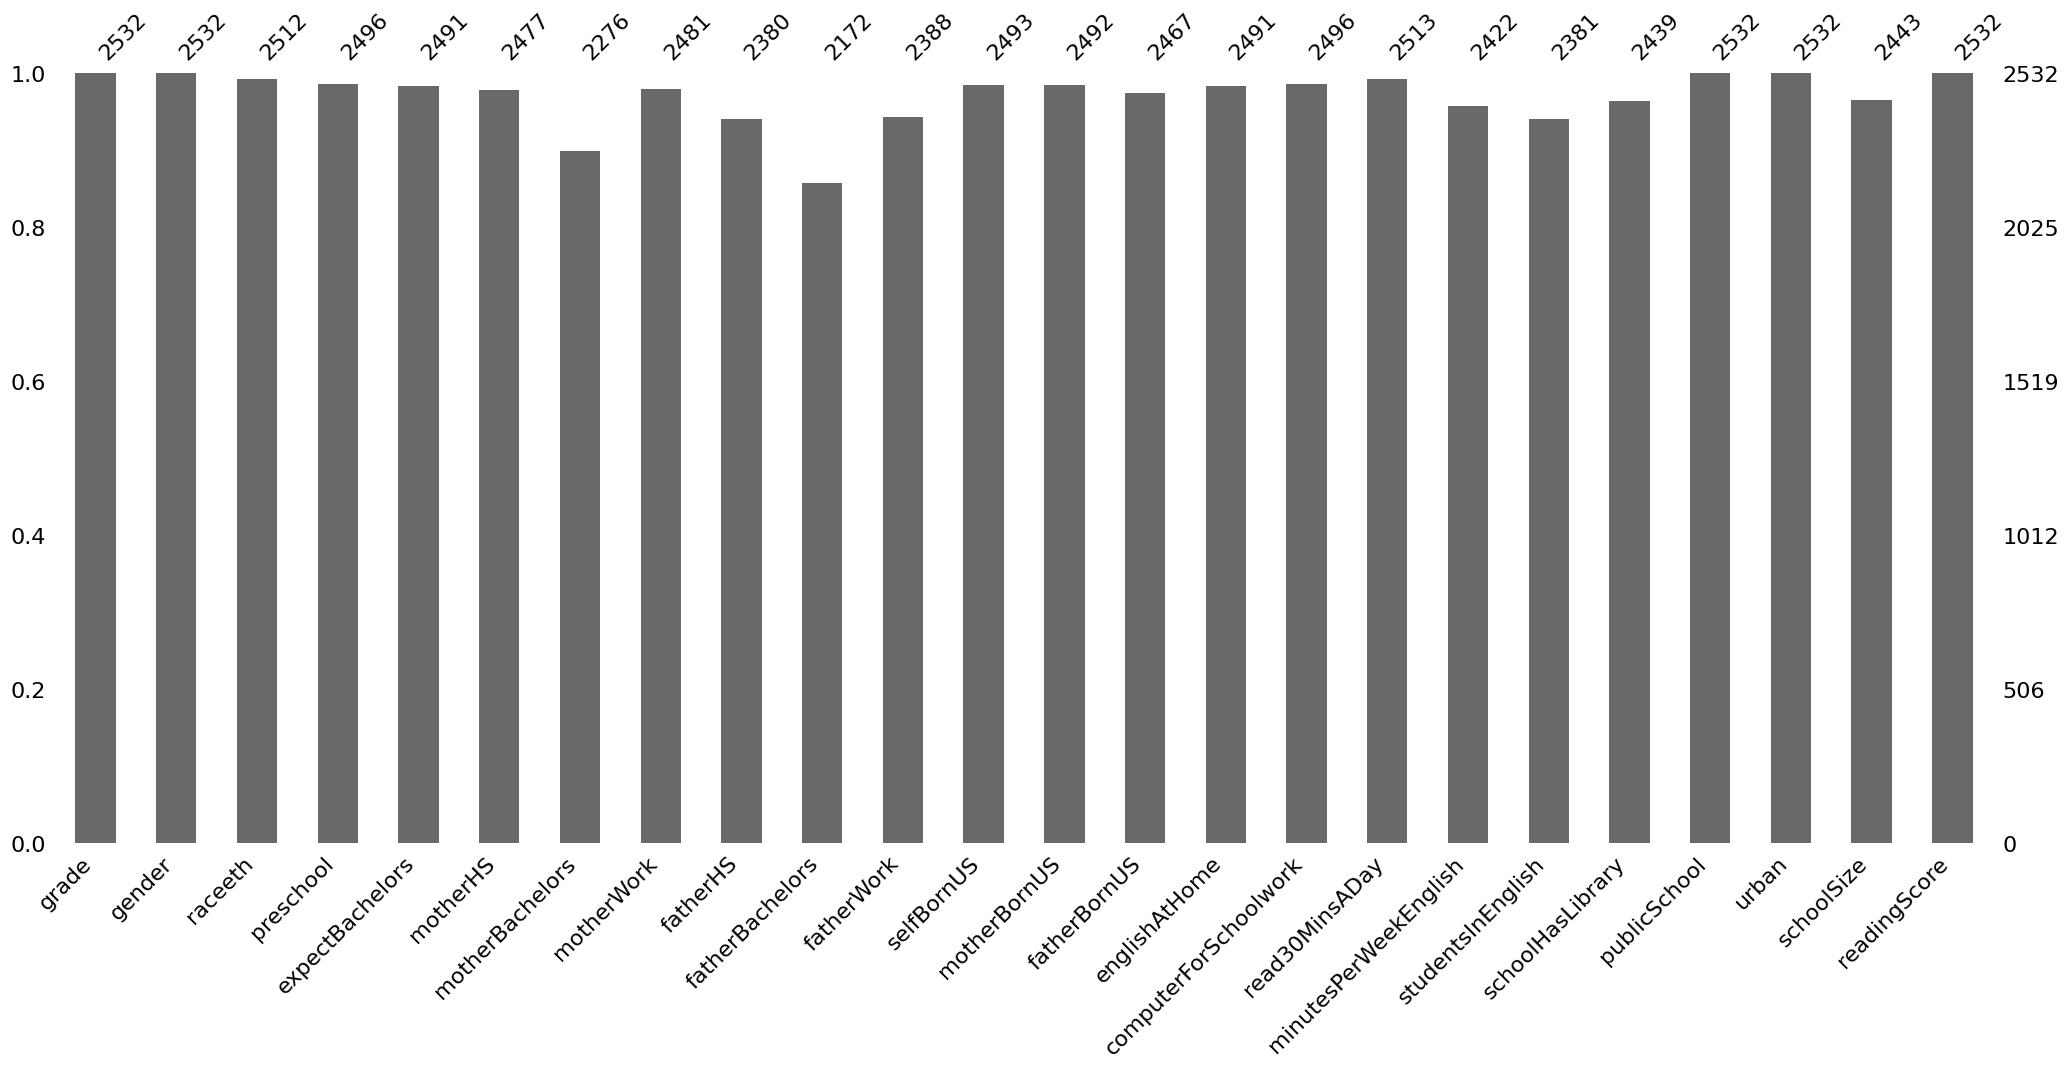

In [29]:
msno.bar(pisa_grade10_df)

In [30]:
pisa_grade10_df.isna().sum()

grade                      0
gender                     0
raceeth                   20
preschool                 36
expectBachelors           41
motherHS                  55
motherBachelors          256
motherWork                51
fatherHS                 152
fatherBachelors          360
fatherWork               144
selfBornUS                39
motherBornUS              40
fatherBornUS              65
englishAtHome             41
computerForSchoolwork     36
read30MinsADay            19
minutesPerWeekEnglish    110
studentsInEnglish        151
schoolHasLibrary          93
publicSchool               0
urban                      0
schoolSize                89
readingScore               0
dtype: int64

**Many of these columns don’t have direct correlations for logical imputation, and filling them randomly could introduce bias.**

Before dropping the columns and filling the missing values, lets try to understand the correlation between the columns and the target variable reading score

In [31]:
numerical_cols = pisa_grade10_df.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = pisa_grade10_df.select_dtypes(include=["object", "category"]).columns.tolist()

print(f"Numerical Columns: \n {numerical_cols} \n\n" )
print(f"Categorical Columns: {categorical_cols}")

Numerical Columns: 
 ['grade', 'gender', 'preschool', 'expectBachelors', 'motherHS', 'motherBachelors', 'motherWork', 'fatherHS', 'fatherBachelors', 'fatherWork', 'selfBornUS', 'motherBornUS', 'fatherBornUS', 'englishAtHome', 'computerForSchoolwork', 'read30MinsADay', 'minutesPerWeekEnglish', 'studentsInEnglish', 'schoolHasLibrary', 'publicSchool', 'urban', 'schoolSize', 'readingScore'] 


Categorical Columns: ['raceeth']


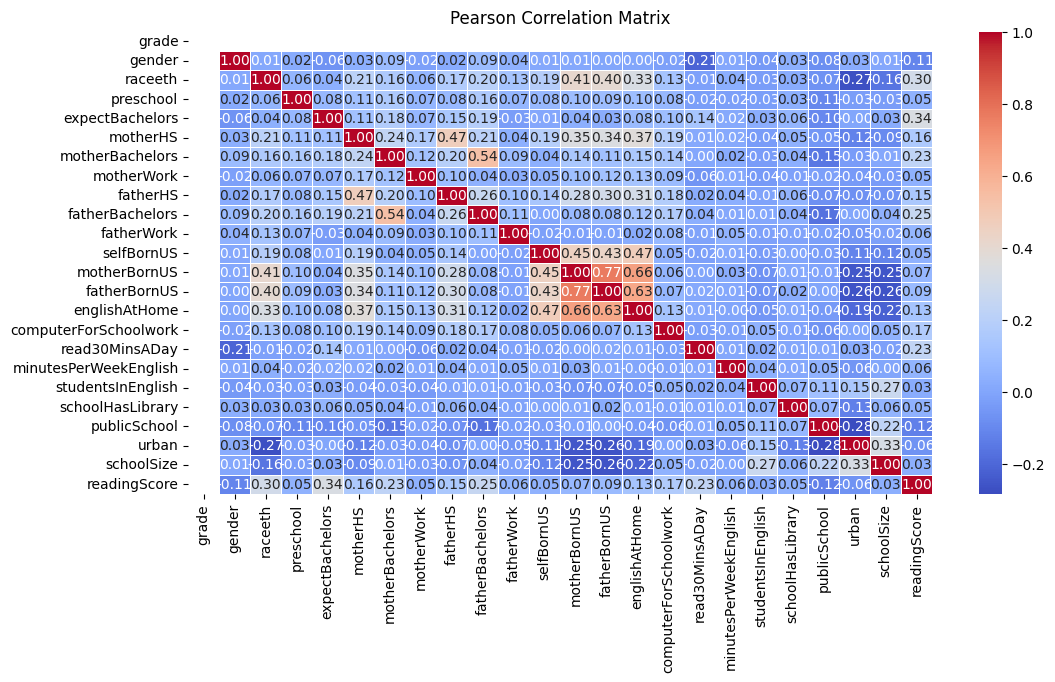

In [32]:
# Convert categorical columns to numerical codes
df_encoded = pisa_grade10_df.copy()
df_encoded["raceeth"] = df_encoded["raceeth"].astype("category").cat.codes
  
pearson_corr = df_encoded.corr(method="pearson")

# heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.heatmap(pearson_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Pearson Correlation Matrix")
plt.show()

Analyze the impact of each variable on readingScore

In [33]:
pearson_corr_reading = pearson_corr["readingScore"].sort_values(ascending=False)

print("Pearson Correlation with Reading Score:\n", pearson_corr_reading)

Pearson Correlation with Reading Score:
 readingScore             1.000000
expectBachelors          0.335594
raceeth                  0.302169
fatherBachelors          0.254061
read30MinsADay           0.234976
motherBachelors          0.226857
computerForSchoolwork    0.169951
motherHS                 0.157114
fatherHS                 0.150061
englishAtHome            0.131716
fatherBornUS             0.085394
motherBornUS             0.071187
fatherWork               0.063928
minutesPerWeekEnglish    0.056131
selfBornUS               0.050761
preschool                0.050385
schoolHasLibrary         0.046476
motherWork               0.045168
schoolSize               0.033729
studentsInEnglish        0.028400
urban                   -0.063716
gender                  -0.111245
publicSchool            -0.123526
grade                         NaN
Name: readingScore, dtype: float64


In [34]:
pisa_grade10_df.isnull().sum()

grade                      0
gender                     0
raceeth                   20
preschool                 36
expectBachelors           41
motherHS                  55
motherBachelors          256
motherWork                51
fatherHS                 152
fatherBachelors          360
fatherWork               144
selfBornUS                39
motherBornUS              40
fatherBornUS              65
englishAtHome             41
computerForSchoolwork     36
read30MinsADay            19
minutesPerWeekEnglish    110
studentsInEnglish        151
schoolHasLibrary          93
publicSchool               0
urban                      0
schoolSize                89
readingScore               0
dtype: int64

In [35]:
pisa_grade10_df['raceeth'].fillna(pisa_grade10_df['raceeth'].mode()[0], inplace=True)

In [36]:
for col in numerical_cols:
    pisa_grade10_df[col].fillna(pisa_grade10_df[col].median(), inplace=True)

In [37]:
pisa_grade10_df.isnull().sum()

grade                    0
gender                   0
raceeth                  0
preschool                0
expectBachelors          0
motherHS                 0
motherBachelors          0
motherWork               0
fatherHS                 0
fatherBachelors          0
fatherWork               0
selfBornUS               0
motherBornUS             0
fatherBornUS             0
englishAtHome            0
computerForSchoolwork    0
read30MinsADay           0
minutesPerWeekEnglish    0
studentsInEnglish        0
schoolHasLibrary         0
publicSchool             0
urban                    0
schoolSize               0
readingScore             0
dtype: int64

# Descriptive Statistics

2. Descriptive Statistics\
• Calculate and analyze descriptive statistics for key variables, such as reading scores
and study habits.

Now, analyse the correlation and descriptive statistics of the cleaned data

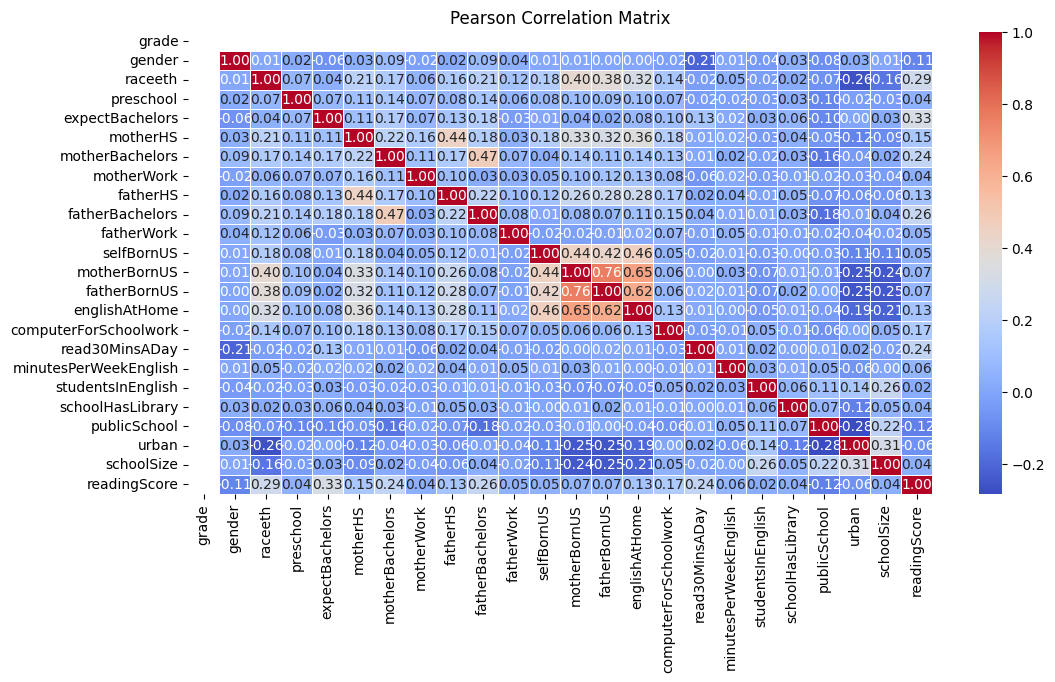

In [38]:
# Convert categorical columns to numerical codes
df_encoded = pisa_grade10_df.copy()
df_encoded["raceeth"] = df_encoded["raceeth"].astype("category").cat.codes
  
pearson_corr = df_encoded.corr(method="pearson")

# heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.heatmap(pearson_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Pearson Correlation Matrix")
plt.show()

In [39]:
pearson_corr_reading = pearson_corr["readingScore"].sort_values(ascending=False)

print("Pearson Correlation with Reading Score:\n", pearson_corr_reading)

Pearson Correlation with Reading Score:
 readingScore             1.000000
expectBachelors          0.325255
raceeth                  0.289698
fatherBachelors          0.258192
motherBachelors          0.241569
read30MinsADay           0.237245
computerForSchoolwork    0.165496
motherHS                 0.148095
fatherHS                 0.131157
englishAtHome            0.126265
fatherBornUS             0.074998
motherBornUS             0.065396
minutesPerWeekEnglish    0.059600
fatherWork               0.050736
selfBornUS               0.047553
preschool                0.044625
schoolHasLibrary         0.040131
motherWork               0.036836
schoolSize               0.035650
studentsInEnglish        0.023697
urban                   -0.063716
gender                  -0.111245
publicSchool            -0.123526
grade                         NaN
Name: readingScore, dtype: float64


In [40]:
import pandas as pd

# Descriptive Statistics
num_stats = pisa_grade10_df[numerical_cols].describe().T 

# Skewness & Kurtosis
num_stats["skewness"] = pisa_grade10_df[numerical_cols].skew()
num_stats["kurtosis"] = pisa_grade10_df[numerical_cols].kurtosis()

# Results
print("Numerical Descriptive Statistics:")
print(num_stats)

print("\nCategorical Descriptive Statistics:")
print(f"\n Race/Ethinicity:\n{pisa_grade10_df['raceeth'].value_counts()}")

Numerical Descriptive Statistics:
                        count         mean         std     min      25%  \
grade                  2532.0    10.000000    0.000000   10.00   10.000   
gender                 2532.0     0.512243    0.499949    0.00    0.000   
preschool              2532.0     0.750790    0.432641    0.00    1.000   
expectBachelors        2532.0     0.802923    0.397870    0.00    1.000   
motherHS               2532.0     0.897314    0.303608    0.00    1.000   
motherBachelors        2532.0     0.323065    0.467740    0.00    0.000   
motherWork             2532.0     0.752370    0.431721    0.00    1.000   
fatherHS               2532.0     0.888626    0.314657    0.00    1.000   
fatherBachelors        2532.0     0.295814    0.456498    0.00    0.000   
fatherWork             2532.0     0.875987    0.329661    0.00    1.000   
selfBornUS             2532.0     0.944313    0.229362    0.00    1.000   
motherBornUS           2532.0     0.810032    0.392353    0.00    

In [41]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation between study habits & reading score
study_habits = ["minutesPerWeekEnglish", "read30MinsADay", "computerForSchoolwork"]
correlation_matrix = pisa_grade10_df[study_habits + ["readingScore"]].corr()
print("Correlation between Study Habits & Reading Scores:\n", correlation_matrix["readingScore"].sort_values(ascending=False))

Correlation between Study Habits & Reading Scores:
 readingScore             1.000000
read30MinsADay           0.237245
computerForSchoolwork    0.165496
minutesPerWeekEnglish    0.059600
Name: readingScore, dtype: float64


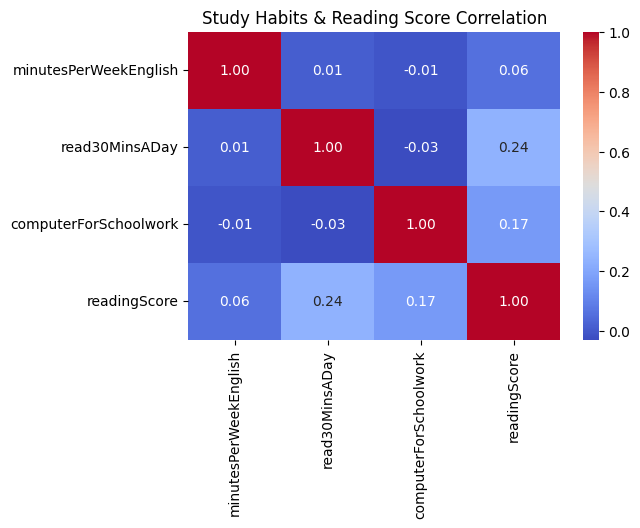

In [42]:
# Visualization: Heatmap of study habit correlations
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Study Habits & Reading Score Correlation")
plt.show()


 Average Reading Scores by Race/Ethnicity:
 raceeth
American Indian/Alaska Native             432.484242
Black                                     444.044144
Hispanic                                  470.908541
More than one race                        503.414419
Native Hawaiian/Other Pacific Islander    521.698333
White                                     525.309189
Asian                                     535.621786
Name: readingScore, dtype: float64

 ANOVA Test Result (Race & Reading Scores): F_onewayResult(statistic=58.332702225484375, pvalue=8.011405179726288e-68)


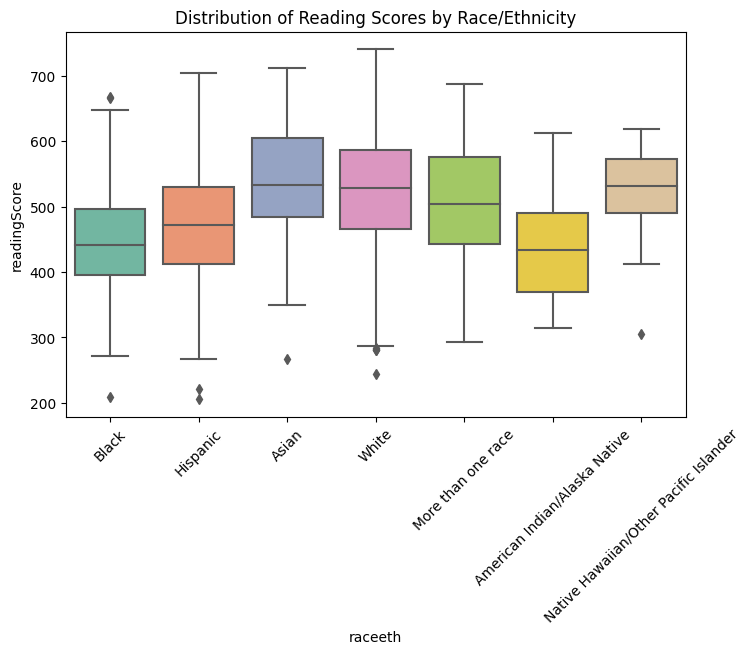

In [43]:
# Comparing reading scores across race/ethnicity
raceeth_scores = pisa_grade10_df.groupby("raceeth")["readingScore"].mean().sort_values()
print("\n Average Reading Scores by Race/Ethnicity:\n", raceeth_scores)

# ANOVA test: Does race/ethnicity significantly impact reading scores?
anova_test = stats.f_oneway(
    *[pisa_grade10_df[pisa_grade10_df["raceeth"] == race]["readingScore"] for race in pisa_grade10_df["raceeth"].unique()]
)
print("\n ANOVA Test Result (Race & Reading Scores):", anova_test)

# Boxplot: Distribution of reading scores by race/ethnicity
plt.figure(figsize=(8, 5))
sns.boxplot(x="raceeth", y="readingScore", data=pisa_grade10_df, palette="Set2")
plt.xticks(rotation=45)
plt.title("Distribution of Reading Scores by Race/Ethnicity")
plt.show()


 Average Reading Scores by Gender:
 gender
1    493.377795
0    513.632089
Name: readingScore, dtype: float64

 ANOVA Test Result (Gender & Reading Scores): F_onewayResult(statistic=nan, pvalue=nan)


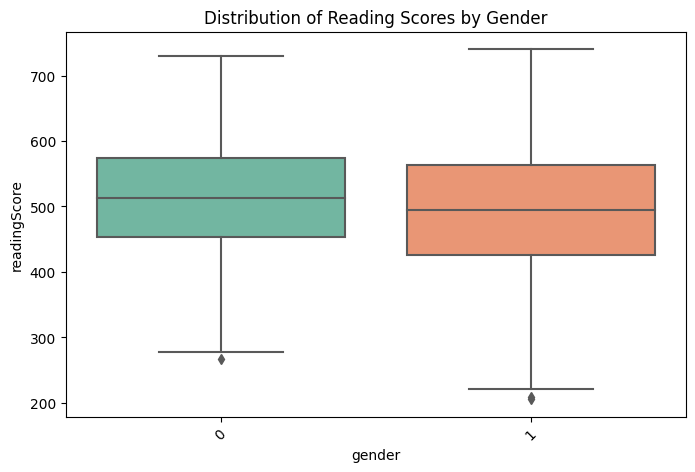

In [44]:
# Comparing reading scores across race/ethnicity
raceeth_scores = pisa_grade10_df.groupby("gender")["readingScore"].mean().sort_values()
print("\n Average Reading Scores by Gender:\n", raceeth_scores)

# ANOVA test: Does race/ethnicity significantly impact reading scores?
anova_test = stats.f_oneway(
    *[pisa_grade10_df[pisa_grade10_df["gender"] == race]["readingScore"] for race in pisa_grade10_df["raceeth"].unique()]
)
print("\n ANOVA Test Result (Gender & Reading Scores):", anova_test)

# Boxplot: Distribution of reading scores by race/ethnicity
plt.figure(figsize=(8, 5))
sns.boxplot(x="gender", y="readingScore", data=pisa_grade10_df, palette="Set2")
plt.xticks(rotation=45)
plt.title("Distribution of Reading Scores by Gender")
plt.show()

# Visualisations

3. Data Visualization\
• Create visualizations to explore relationships in the data, including box plots and
scatter plots.


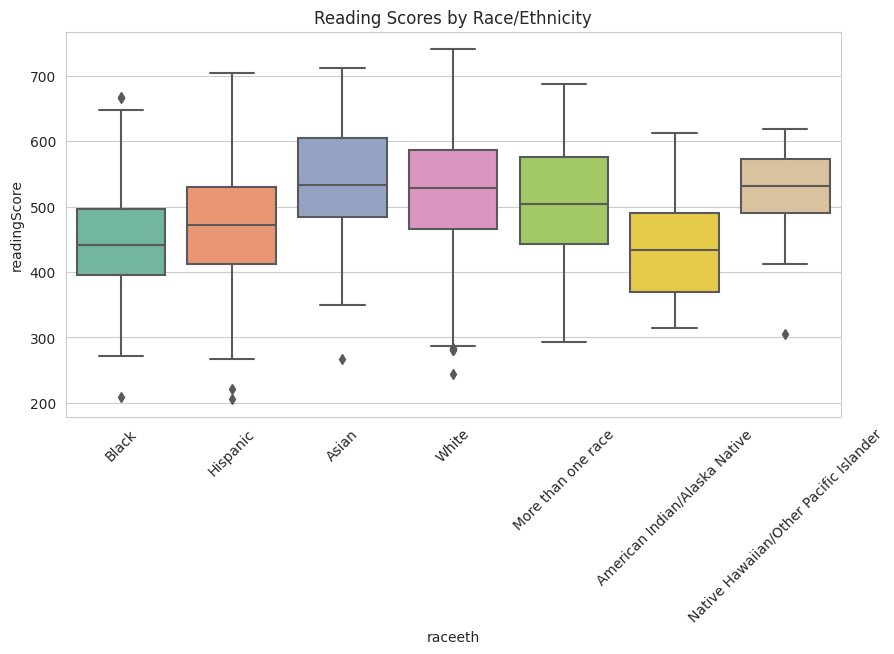

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set visualization style
sns.set_style("whitegrid")

#Boxplot: Reading Scores by Race/Ethnicity
plt.figure(figsize=(10, 5))
sns.boxplot(x="raceeth", y="readingScore", data=pisa_grade10_df, palette="Set2")
plt.xticks(rotation=45)
plt.title("Reading Scores by Race/Ethnicity")
plt.show()

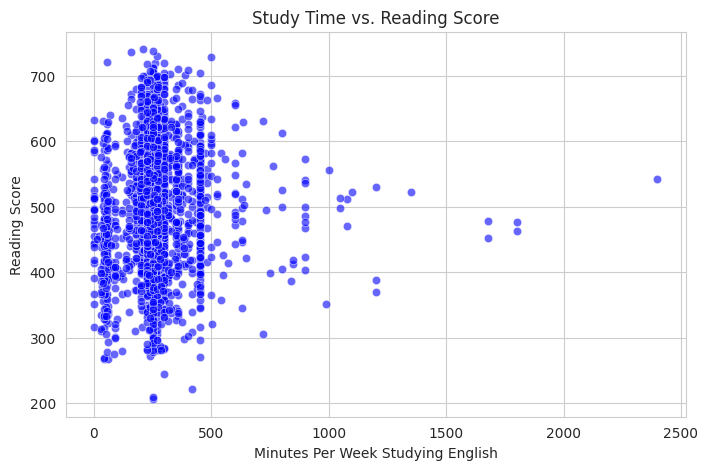

In [46]:
# Scatter Plot: Minutes per Week Studying English vs. Reading Score
plt.figure(figsize=(8, 5))
sns.scatterplot(x="minutesPerWeekEnglish", y="readingScore", data=pisa_grade10_df, alpha=0.6, color="blue")
plt.title("Study Time vs. Reading Score")
plt.xlabel("Minutes Per Week Studying English")
plt.ylabel("Reading Score")
plt.show()

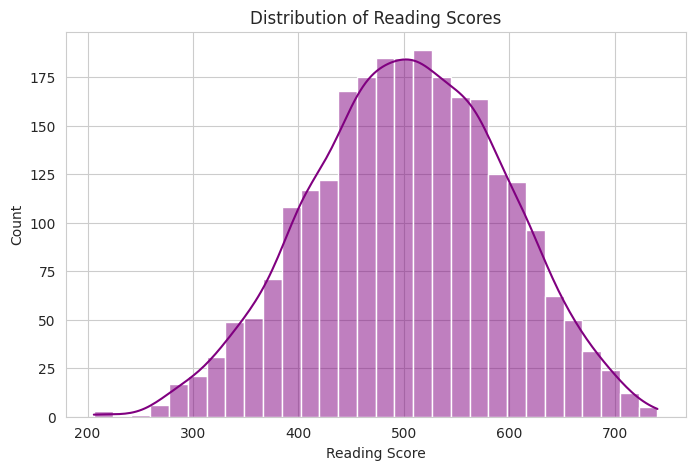

In [47]:
# Histogram & KDE Plot: Distribution of Reading Scores
plt.figure(figsize=(8, 5))
sns.histplot(pisa_grade10_df["readingScore"], bins=30, kde=True, color="purple")
plt.title("Distribution of Reading Scores")
plt.xlabel("Reading Score")
plt.ylabel("Count")
plt.show()

# **Hypotheisis Testing** 

4. Hypothesis Testing\
• Formulate hypotheses regarding the impact of specific factors (e.g., gender, parental
education) on reading scores.\
• Conduct appropriate statistical tests, such as t-tests or ANOVA, to evaluate these
hypotheses.


**Hypothesis: Gender Affects Reading Scores**

In [48]:
from scipy.stats import ttest_ind

# Split data by gender
male_scores = pisa_grade10_df[pisa_grade10_df["gender"] == 1]["readingScore"]
female_scores = pisa_grade10_df[pisa_grade10_df["gender"] == 0]["readingScore"]

# Perform t-test
t_stat, p_value = ttest_ind(male_scores, female_scores, equal_var=False)
print(f"Gender & Reading Score T-Test:\nT-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("Conclusion: Reject Hypotheis - Gender significantly impacts reading scores.")
else:
    print("Conclusion: Fail to reject Hypotheis - No significant difference between genders.")


Gender & Reading Score T-Test:
T-statistic: -5.6411, P-value: 0.0000
Conclusion: Reject Hypotheis - Gender significantly impacts reading scores.


**Hypothesis: Parental Education Impacts Reading Scores**

In [49]:
from scipy.stats import f_oneway

# Parental education level
no_degree = pisa_grade10_df[(pisa_grade10_df["motherBachelors"] == 0) & (pisa_grade10_df["fatherBachelors"] == 0)]["readingScore"]
one_degree = pisa_grade10_df[(pisa_grade10_df["motherBachelors"] == 1) | (pisa_grade10_df["fatherBachelors"] == 1)]["readingScore"]
both_degrees = pisa_grade10_df[(pisa_grade10_df["motherBachelors"] == 1) & (pisa_grade10_df["fatherBachelors"] == 1)]["readingScore"]

# ANOVA Test
anova_result = f_oneway(no_degree, one_degree, both_degrees)
print(f"\nANOVA Test for Parental Education:\nF-statistic: {anova_result.statistic:.4f}, P-value: {anova_result.pvalue:.4f}")

# Interpretation
if anova_result.pvalue < 0.05:
    print("Conclusion: Reject Hypotheisis - Parental education significantly impacts reading scores.")
else:
    print("Conclusion: Fail to reject Hypotheisis - No significant impact of parental education.")



ANOVA Test for Parental Education:
F-statistic: 150.0514, P-value: 0.0000
Conclusion: Reject Hypotheisis - Parental education significantly impacts reading scores.


**Hypothesis: Race/Ethnicity Affects Reading Scores**

In [50]:
# ANOVA test on race/ethnicity groups
anova_race = f_oneway(*[pisa_grade10_df[pisa_grade10_df["raceeth"] == race]["readingScore"] for race in pisa_grade10_df["raceeth"].unique()])
print(f"\nANOVA Test for Race/Ethnicity:\nF-statistic: {anova_race.statistic:.4f}, P-value: {anova_race.pvalue:.4f}")

# Interpretation
if anova_race.pvalue < 0.05:
    print("Conclusion: Reject Hypotheisis - Race/ethnicity significantly affects reading scores.")
else:
    print("Conclusion: Fail to reject Hypotheisis - No significant impact of race/ethnicity.")



ANOVA Test for Race/Ethnicity:
F-statistic: 58.3327, P-value: 0.0000
Conclusion: Reject Hypotheisis - Race/ethnicity significantly affects reading scores.


# Regression Analysis

5. Regression Analysis

• Use multiple regression analysis to identify significant predictors of reading scores.\
• Interpret the coefficients to understand the influence of each factor.

In [51]:
import statsmodels.api as sm

# Define independent (X) and dependent (y) variables
X = df_encoded[['gender', 'raceeth', 'motherBachelors', 'fatherBachelors', 
        'minutesPerWeekEnglish', 'read30MinsADay', 'computerForSchoolwork', 
        'publicSchool', 'urban']]
y = df_encoded['readingScore']

X = pd.get_dummies(X, drop_first=True)

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           readingScore   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     78.66
Date:                Sat, 01 Mar 2025   Prob (F-statistic):          9.83e-129
Time:                        23:45:36   Log-Likelihood:                -14701.
No. Observations:                2532   AIC:                         2.942e+04
Df Residuals:                    2522   BIC:                         2.948e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   424.59

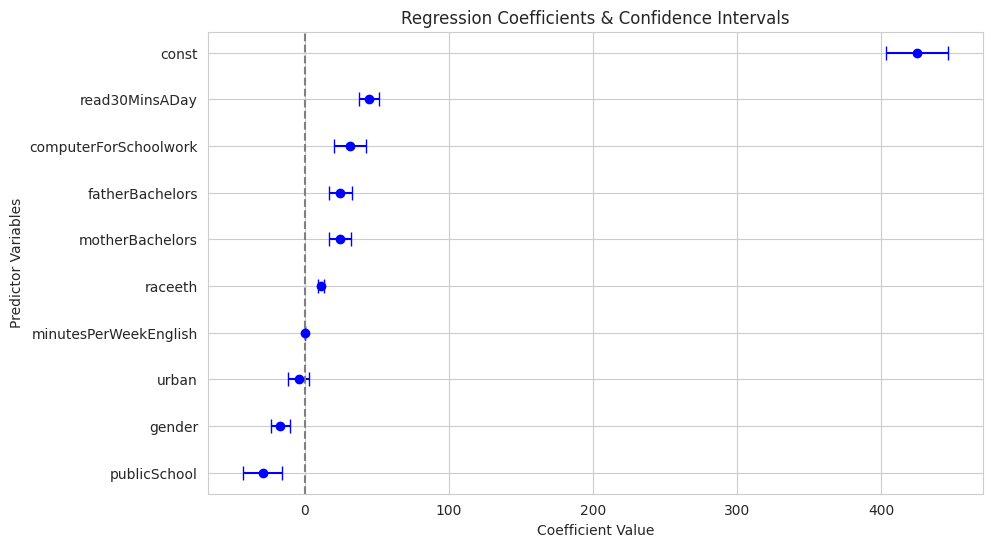

In [52]:
import matplotlib.pyplot as plt

# Extract coefficients and confidence intervals
coef = model.params  # Regression coefficients
conf = model.conf_int()  # Confidence intervals
conf["Coefficient"] = coef

conf = conf.sort_values(by="Coefficient", ascending=True)

# Plot
plt.figure(figsize=(10, 6))
plt.errorbar(conf["Coefficient"], conf.index, 
             xerr=(conf[1] - conf[0]) / 2, fmt='o', color='b', capsize=5)
plt.axvline(0, color='gray', linestyle='--')  # Reference line at 0
plt.title("Regression Coefficients & Confidence Intervals")
plt.xlabel("Coefficient Value")
plt.ylabel("Predictor Variables")
plt.show()


6. Confidence Intervals

Calculate confidence intervals for the regression coefficients to assess the reliability
of the estimates.

In [53]:
import statsmodels.api as sm

# Assuming 'model' is the fitted regression model
conf_intervals = model.conf_int()
conf_intervals.columns = ['Lower Bound', 'Upper Bound']

# Display the confidence intervals
print(conf_intervals)


                       Lower Bound  Upper Bound
const                   403.295548   445.885141
gender                  -23.381337   -10.423116
raceeth                   9.418435    13.214805
motherBachelors          16.502874    31.900624
fatherBachelors          16.578739    32.559990
minutesPerWeekEnglish     0.006802     0.050061
read30MinsADay           37.316340    51.580748
computerForSchoolwork    20.255030    42.467058
publicSchool            -42.822225   -15.440764
urban                   -11.447716     2.899890


# Conclusion and Recommendations

**Key Findings from the Analysis**
______

1. Reading Scores and Study Habits:

Students who read for at least 30 minutes a day tend to have higher reading scores.
Regular use of computers for schoolwork is also linked to improved reading performance.

2. Impact of Parental Education: 

Students with parents who have a bachelor’s degree (both mother and father) tend to score higher in reading. This highlights the role of parental education in shaping student outcomes.

3. Influence of School and Learning Environment:

Public school students show slightly lower reading scores compared to private school students.
Schools with libraries and higher minutes of English instruction per week tend to have better student outcomes.

4. Demographic and Socioeconomic Factors:

Race/ethnicity differences in reading scores suggest that Urban students tend to score higher than those from rural areas, possibly due to better educational resources.

5. Regression Analysis Insights:

Reading 30 minutes a day, parental education, and school-related factors (library, computer use, etc.) are significant predictors of reading scores.

Gender and urban residence have a small but notable impact on scores.
______

# Recommendations for Educational Practices and Policies
______

1. Encourage Reading Habits at Home and in Schools

Schools should promote daily reading habits, providing structured reading programs and incentives.
Parents should be encouraged to engage in their children's learning through reading activities.
Improve Access to Educational Resources

Ensure that all students have access to school libraries and computers for learning.
Increase funding for underprivileged schools to bridge the resource gap.

2. Strengthen Parental Involvement

Schools should provide parental workshops on how they can support their child’s education.
Policy initiatives should incentivize parental engagement, especially for families with lower educational backgrounds.

3. Enhance English Instruction and Teaching Quality
   
Schools should optimize minutes per week spent on English instruction, focusing on reading comprehension.
